In [1]:
# !wget https://gist.githubusercontent.com/huseinzol05/98974ae8c6c7a65d4bc0af9f5003786a/raw/2e06e71ef7349a57bc58cc9913ae6bae1f9f8447/mp.py

In [2]:
from PIL import Image
from glob import glob
import requests
import mp
import json
import os
import urllib.parse

In [3]:
!mkdir image
# !rm image/*.jpeg

mkdir: cannot create directory ‘image’: File exists


In [4]:
files = glob('partitions/*.jsonl')
len(files)

52

In [5]:
with open('partitions/0.jsonl') as fopen:
    for l in fopen:
        l = json.loads(l)
        break

In [6]:
q = l['parent_href']
url = urllib.parse.unquote(q.split('?imgurl=')[1].split('&tbnid=')[0])
image = Image.open(requests.get(url, stream=True, timeout = 60).raw)

In [7]:
files[0].split('/')[-1].replace('.jsonl', '')

'33'

In [8]:
from tqdm import tqdm

def loop(files):
    files, _ = files
    for file in files:
        index = file.split('/')[-1].replace('.jsonl', '')
        with open(file) as fopen:
            i = 0
            for l in tqdm(fopen):
                l = json.loads(l)
                filename = os.path.join('image', f'{index}-{i}.jpeg')
                if os.path.exists(filename):
                    i += 1
                    continue
                    
                try:
                    q = l['parent_href']
                    url = urllib.parse.unquote(q.split('?imgurl=')[1].split('&tbnid=')[0])
                    image = Image.open(requests.get(url, stream=True, timeout = 20).raw)

                    image.save(filename)
                except Exception as e:
                    pass
                
                i += 1

In [9]:
# loop((files[:1], 0))

In [1]:
mp.multiprocessing(files, loop, cores = 30, returned = False)

In [13]:
!du -hs image

160G	image


In [14]:
from glob import glob

In [15]:
files = glob('image/*.jpeg')

In [16]:
len(files)

1455143

In [23]:
splitted = files[0].split('/')[1].split('-')
splitted[1] = splitted[1].split('.')[0]
splitted

['36', '39052']

'{"alt_text": "Inilah Fungsi Hidung - KlikDokter", "image_url": null, "parent_href": "https://www.google.com/imgres?imgurl=https%3A%2F%2Fs3-publishing-cmn-svc-prd.s3.ap-southeast-1.amazonaws.com%2Farticle%2FF-3-oHkFZllcuZvrdx7a7%2Foriginal%2F080923400_1483456663-Rubrik_20THT_3__20Inilah_20Fungsi_20Hidung.jpg&tbnid=Mt2ap9e9Ayt97M&vet=12ahUKEwje2LSq9OOEAxX-I2IAHVbHDtIQMygFegQIARBw..i&imgrefurl=https%3A%2F%2Fwww.klikdokter.com%2Finfo-sehat%2Ftht%2Finilah-fungsi-hidung&docid=otW6O63Mg703nM&w=450&h=450&q=hidung&ved=2ahUKEwje2LSq9OOEAxX-I2IAHVbHDtIQMygFegQIARBw", "image_base64": ""}\n'
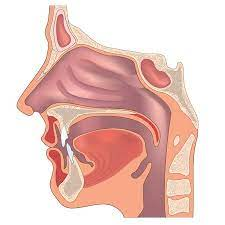

In [30]:
import linecache

linecache.getline(os.path.join('partitions', f'{splitted[0]}.jsonl'), int(splitted[1]))

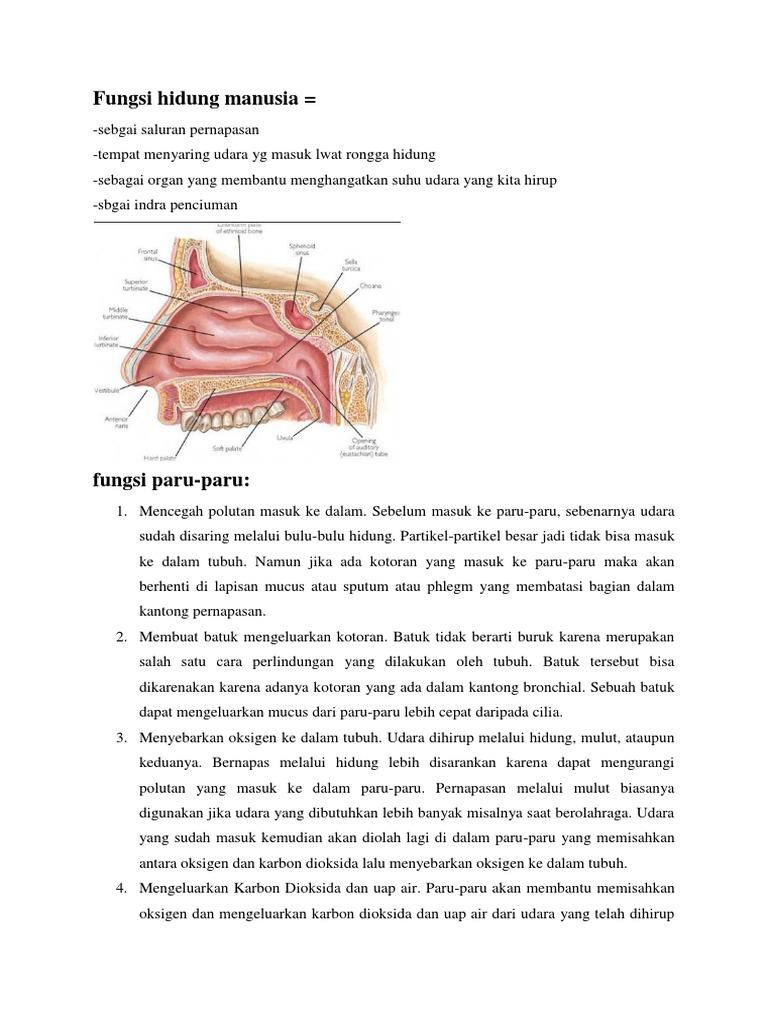

In [32]:
Image.open(files[0])